In [2]:
#!pip install rise
#bei dem Befehl fehlt etwas für den Präsentationsmodus

## Business Undestanding


### Bestimmung der Problemstellung: 
Hier wird an den Anwender die Anforderung gestellt, das Data Mining Projekt betriebswirtschaftlich auszurichten. Dabei werden die operationalen und betriebswirtschaftlichen Zielkriterien formuliert.
>Bei der vorliegenden Projektaufgabe gilt es, drei Prognosemodelle zu erstellen, um auf Basis der vorliegenden Daten zu den Brunnen bestimmen zu können, welche der gegebenen Brunnen funktionieren, welche nicht und welche repariert werden müssen. Dabei soll anhand der ML-Pipeline, das heißt dem CRISP-DM Modell vorgegangen werden und die Güte der einzelnen Modelle anhand der AUC auf den Testdaten qualifiziert werden. 



### Bestimmung analytischer Ziele:
Ausgehend von der zuvor bestimmten Problemdefinition müssen dazu die erforderlichen Datenanalyseaufgaben ermittelt werden. Zudem müssen die Erfolgskriterien für das Data Mining-Projekt bestimmt werden.
>Prognosemodell welche Brunnen funktionieren und welche nicht

>Prognosemodell für die Brunnen die repariert werden müssen 

>Prognosemodell, das zwischen allen drei Klassen unterscheidet


## Data Understanding


### Daten sammeln: 
Hier werden die benötigten Daten für die Analyse beschaffen und, wenn erforderlich, in bereits bestehende Datenmengen integriert. Dabei sollten Probleme, die bei der Datenbeschaffung auftreten, stets dokumentiert werden, um mögliche Diskrepanzen bei einem Folgeprojekt in der Zukunft zu vermeiden.

Im folgenden werden alle vorhandenen Daten der Trainings- und Testdatensätze aufgelistet:

>amount_tsh - Total static head (amount water available to waterpoint)

>date_recorded - The date the row was entered

>funder - Who funded the well

>gps_height - Altitude of the well

>installer - Organization that installed the well

>longitude - GPS coordinate

>latitude - GPS coordinate 

>Ywpt_name - Name of the waterpoint if there is one

>num_private -

>basin - Geographic water basin

>subvillage - Geographic location

>region - Geographic location

>region_code - Geographic location (coded)

>district_code - Geographic location (coded)

>lga - Geographic location

>ward - Geographic location

>population - Population around the well

>public_meeting - True/False

>recorded_by - Group entering this row of data

>scheme_management - Who operates the waterpoint

>scheme_name - Who operates the waterpoint

>permit - If the waterpoint is permitted

>construction_year - Year the waterpoint was constructed

>extraction_type - The kind of extraction the waterpoint uses

>extraction_type_group - The kind of extraction the waterpoint uses

>extraction_type_class - The kind of extraction the waterpoint uses

>management - How the waterpoint is managed

>management_group - How the waterpoint is managed

>payment - What the water costs

>payment_type - What the water costs

>water_quality - The quality of the water

>quality_group - The quality of the water

>quantity - The quantity of water

>quantity_group - The quantity of water

>source - The source of the water

>source_type - The source of the water

>source_class - The source of the water 


> Bei der Beschreibung der einzelnen Merkmale, und somit der einzelnen Spalten, des Datensatzes fällt auf, dass die Beschreibungen der einzelnen Merkmale öfters doppelt vorkommen. Zum Beispiel haben die Merkmale quantity und quantity_group genau dieselbe Beschreibung. Daraus lässt sich schließen, dass zweiteres Merkmal eventuell "nur" eine Gruppierung des ersteren ist. 

> Diese Merkmale könnten eventuell in der Data Preparation entfernt werden.

In [3]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from utils import Dataset
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

import pandas as pd
import numpy as np
from pickle import load
from tqdm import tqdm
from itertools import product

from utils import one_vs_all, plot_roc, get_prob_and_pred

from sklearn.model_selection import GridSearchCV
from utils import plot_roc

In [4]:
# read the csv files / datasets into a pandas dataframe
train_data = pd.read_csv("pump_train.csv")
test_data = pd.read_csv("pump_test.csv")

### Daten beschreiben: 
In diesem Schritt gilt es, ein allgemeines Verständnis für die Daten zu erlangen. Zudem werden die Eigenschaften der Daten beschrieben, wie z.B. Quantität der Daten, Formateigenschaften, Anzahl der Einträge und Felder sowie Eigenschaften der Felder. Die entscheidende Frage ist, ob die vorliegenden Daten der Datenanalyse genügen, um das Projekt erfolgreich abzuschließen.


In [5]:
# using different functions of pandas to describe the dataset better
train_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [6]:
train_data.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,12237,30.0,2013-01-23,Government Of Tanzania,107,District Council,39.360880,-10.295705,Zahanati Membe,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional
1,24566,0.0,2013-02-07,Private Individual,0,Edward,32.644074,-3.859265,Kwa Mama Wini,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,functional
2,20536,0.0,2011-07-15,Sawaka,0,DWE,30.999792,-1.721771,Kwasimon,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
3,30633,200.0,2011-03-25,Government Of Tanzania,2142,Commu,34.060324,-9.335288,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,2993,0.0,2011-02-17,African Muslim Agency,290,District Council,38.862874,-7.165410,Msikitini,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
5,41668,0.0,2013-02-15,Nyitamboka,1229,Nyitamboka,34.349079,-1.630274,Nyitamboka Kitanyita,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
6,61839,0.0,2013-02-09,Rwssp,0,DWE,32.586745,-3.815508,Idete,0,...,milky,milky,dry,dry,shallow well,shallow well,groundwater,other,other,non functional
7,62441,0.0,2011-02-21,Government Of Tanzania,75,Centr,39.010886,-7.615327,Nyambili Primary School 2,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
8,53492,0.0,2012-10-18,Member Of Perliament Ahmed Ali,0,Member of Perliament Ahmed Ali,33.165581,-3.796312,Kwa Hima Ganaye,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
9,54314,0.0,2011-08-01,The Desk And Chair Foundat,0,The desk and chair foundat,33.326639,-3.027799,Nguruko,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50490 entries, 0 to 50489
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50490 non-null  int64  
 1   amount_tsh             50490 non-null  float64
 2   date_recorded          50490 non-null  object 
 3   funder                 47396 non-null  object 
 4   gps_height             50490 non-null  int64  
 5   installer              47380 non-null  object 
 6   longitude              50490 non-null  float64
 7   latitude               50490 non-null  float64
 8   wpt_name               50490 non-null  object 
 9   num_private            50490 non-null  int64  
 10  basin                  50490 non-null  object 
 11  subvillage             50175 non-null  object 
 12  region                 50490 non-null  object 
 13  region_code            50490 non-null  int64  
 14  district_code          50490 non-null  int64  
 15  lg

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50490.0,37113.857695,21447.241039,0.000000,18517.250000,37027.500000,55636.750000,7.424700e+04
amount_tsh,50490.0,319.158123,2987.517185,0.000000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,50490.0,669.714280,693.123330,-90.000000,0.000000,371.000000,1322.000000,2.770000e+03
longitude,50490.0,34.078591,6.553382,0.000000,33.084409,34.906548,37.178899,4.034519e+01
latitude,50490.0,-5.708336,2.943806,-11.648378,-8.541643,-5.019807,-3.327550,-2.000000e-08
num_private,50490.0,0.459497,10.413455,0.000000,0.000000,0.000000,0.000000,1.402000e+03
region_code,50490.0,15.280511,17.550035,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,50490.0,5.641731,9.668596,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,50490.0,180.913389,479.854870,0.000000,0.000000,25.000000,215.750000,3.050000e+04
construction_year,50490.0,1301.724520,951.258506,0.000000,0.000000,1986.000000,2004.000000,2.013000e+03


In [9]:
# checking how many different values are there in each column
train_data.nunique()

id                       50490
amount_tsh                  94
date_recorded              348
funder                    1734
gps_height                2409
installer                 1964
longitude                48914
latitude                 48916
wpt_name                 32390
num_private                 62
basin                        9
subvillage               17774
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2085
population                 989
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2583
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [10]:
train_data.shape 

(50490, 41)

> Allgemein geht aus der Analyse der Daten oben hervor, dass der Datensatz aus 50940 Zeilen à 41 Spalten besteht. 

> Dabei sind die Datentypen des Datensatzes hauptsächlich int, float und object.

### Untersuchung der Daten: 
Zur Untersuchung der Daten werden erste Analysen mit den Daten betrieben. Ziel ist es dabei, die ersten Erkenntnisse und Hypothesen zu visualisieren.

In [11]:
# Datensatz nach fehlenden Werten untersuchen
train_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3094
gps_height                   0
installer                 3110
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 315
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2846
recorded_by                  0
scheme_management         3269
scheme_name              23942
permit                    2591
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

> In den Spalten funder, installer, subvillage, public_meeting, scheme_management, scheme, name und permit existieren fehlende Werte. 

>Diese fehlende Werte müssen in der Data Preparation später bereinigt bzw. aufgefüllt werden.

>seperate Test- und Trainingsdatensätze


Folgend wollen wir den Datensatz genauer visualisieren, das heißt wir wollen die Verteilung der einzelnen Merkmale und die Abhängigkeiten dieser untereinander genauer betrachten:

#### Allgemeine Verteilung des Merkmals status_group im Datensatz:

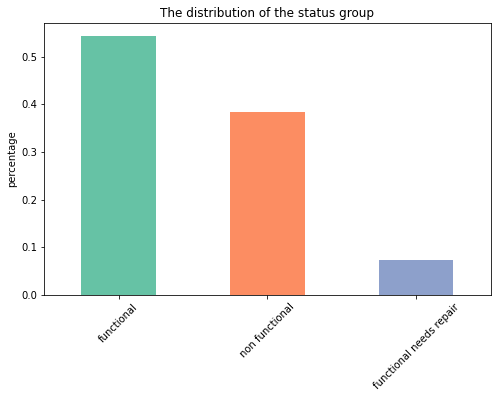

In [12]:
# defining colors for the plots
my_cmap = plt.get_cmap("Set2")
# making the plot
fig = plt.figure(figsize=(8,5))  
train_data.status_group.value_counts(normalize = "true").plot(kind="bar", title="The distribution of the status group", ylabel="percentage", color=my_cmap.colors)
plt.xticks(rotation=45);

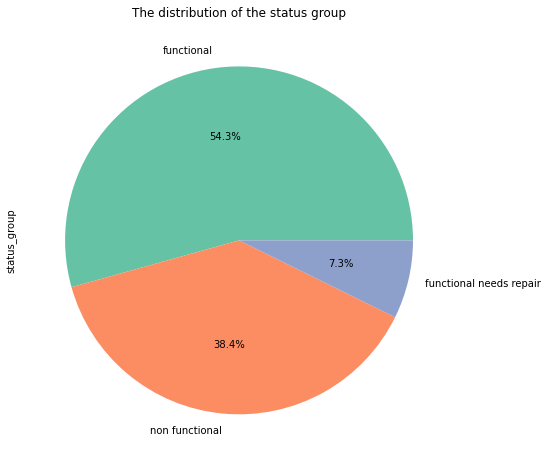

In [13]:
# making a pie chart
fig = plt.figure(figsize=(10,8)) 
train_data.status_group.value_counts(normalize = "true").plot(kind="pie", title="The distribution of the status group", autopct='%1.1f%%', colors=my_cmap.colors)
plt.xticks(rotation=45);

>Wie in beiden Grafiken zu erkennen ist sind über 50% der Brunnen funktionsfähig. Nahezu 40% sind nicht funktionsfähig und etwas weniger als 10% müssen repariert werden. Die Verteilung zeigt auf, dass nur die Hälfte aller Brunnen einsatzbereit sind um die Anwohner mit Wasser zu versorgen.

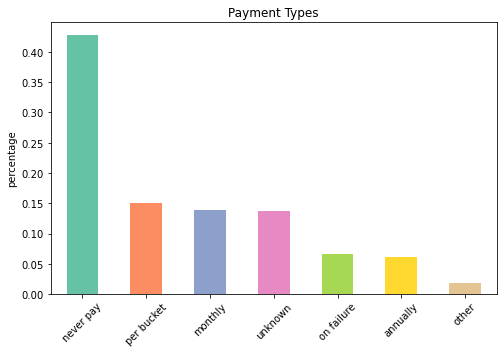

In [14]:
fig = plt.figure(figsize=(8,5))  
train_data.payment_type.value_counts(normalize = "true").plot(kind="bar", title="Payment Types", ylabel="percentage", color=my_cmap.colors)
plt.xticks(rotation=45);

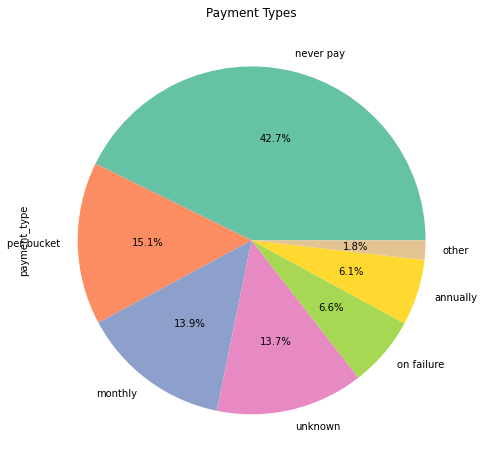

In [15]:
fig = plt.figure(figsize=(10,8))  
train_data.payment_type.value_counts(normalize = "true").plot(kind="pie", title="Payment Types", autopct='%1.1f%%', colors=my_cmap.colors)
plt.xticks(rotation=45);

>Beschreibung

#### Korrelations-Heatmap

C:\Users\ibele\AppData\Local\Temp/ipykernel_28572/2265934247.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


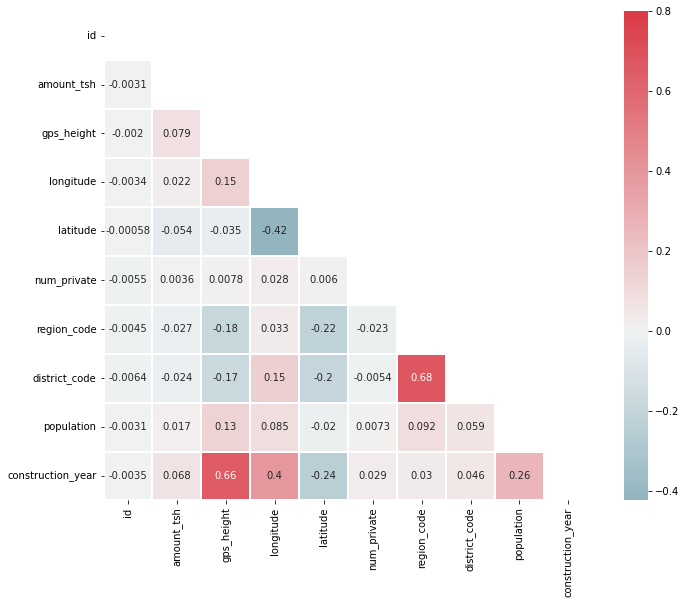

In [16]:
# Subset the dataset into all the numerical values
numeric = train_data.select_dtypes(include=[np.number])

# Compete the correlation matrix
corr = numeric._get_numeric_data().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0.0,
                     vmax=.8, linewidths=0.01, annot=True, square=True, ax=ax) #eventuell linewidths=.5,
plt.show()

Datenbereinigung für die große Heatmap

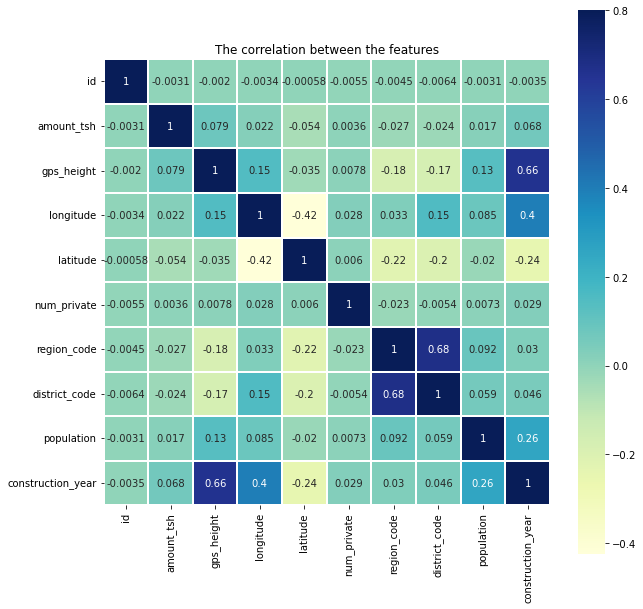

In [17]:
corr=train_data.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('The correlation between the features');

>Beschreibung

>bereinigte und erweiterte Heatmap

#### Histogramm der Merkmale

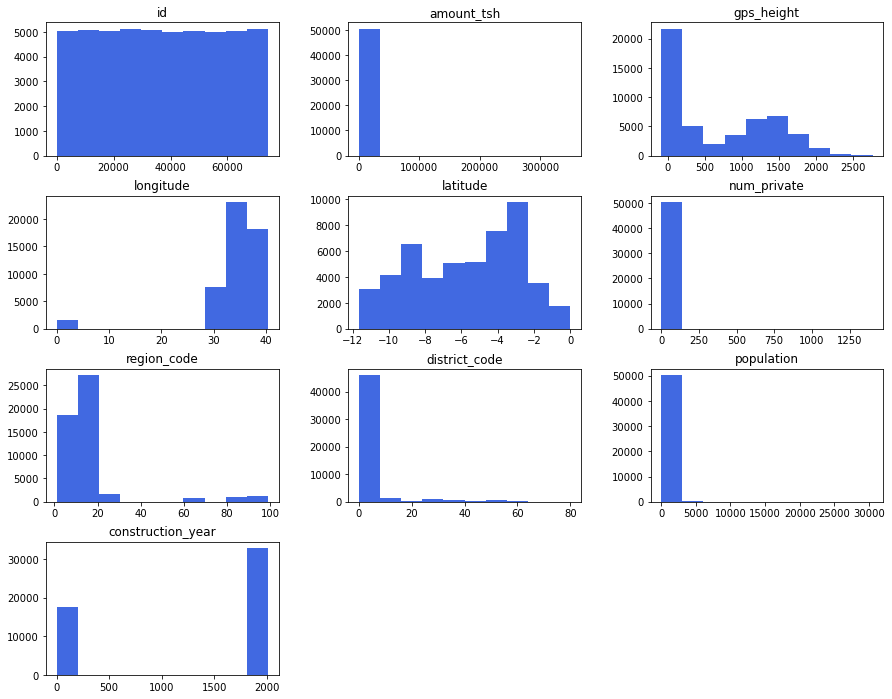

In [18]:
train_data.hist(bins=10,figsize=(15,12),grid=False,color="royalblue");

>Beschreibung

>Erkennung: Werte ersetzen

#### Verteilung des Merkmals status_group pro Region

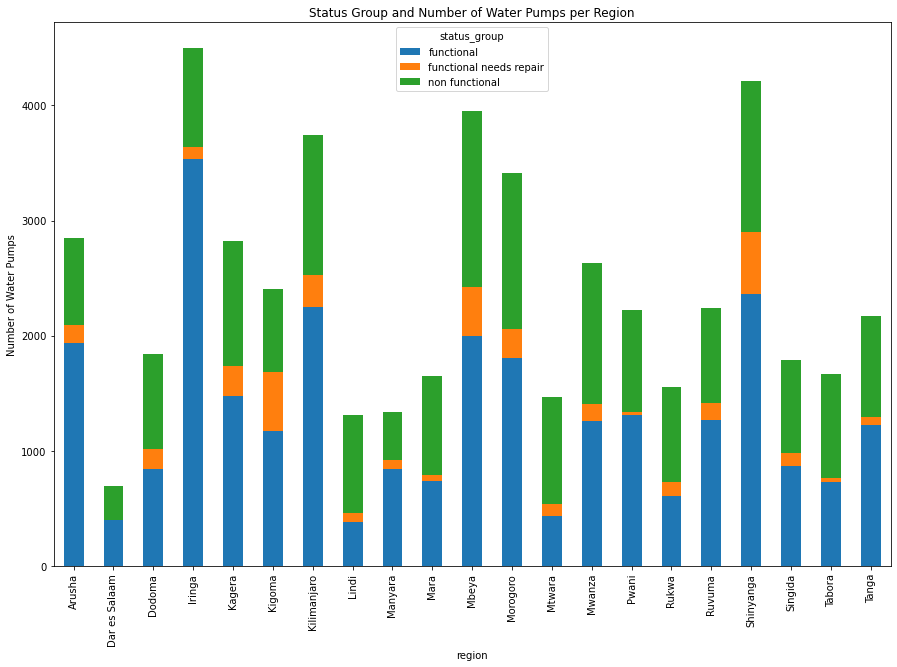

In [31]:
df_plot = train_data.groupby(['region', 'status_group']).size().reset_index().pivot(columns='status_group', index='region', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(15,10), title='Status Group and Number of Water Pumps per Region', ylabel='Number of Water Pumps');

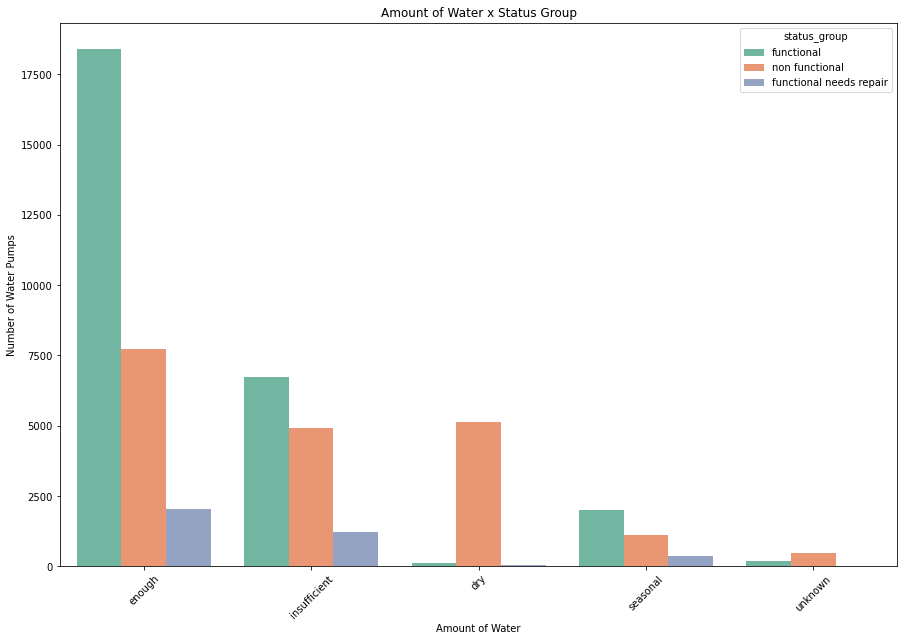

In [18]:
fig = plt.figure(figsize=(15,10))  
plot = sns.countplot(data=train_data, x='quantity', hue='status_group', palette="Set2")
plot.set(xlabel='Amount of Water', ylabel='Number of Water Pumps', title='Amount of Water x Status Group')
plt.xticks(rotation=45);
# Quelle: https://github.com/dustiny5/Predictive_Modeling/blob/master/Water_Pump_Best%20-%20Final.ipynb

>Beschreibung

>Bezug auf 'dry'

#### Verteilung des Merkmals public_meeting im Datensatz:

1.29% of the pumps in the dataset are private


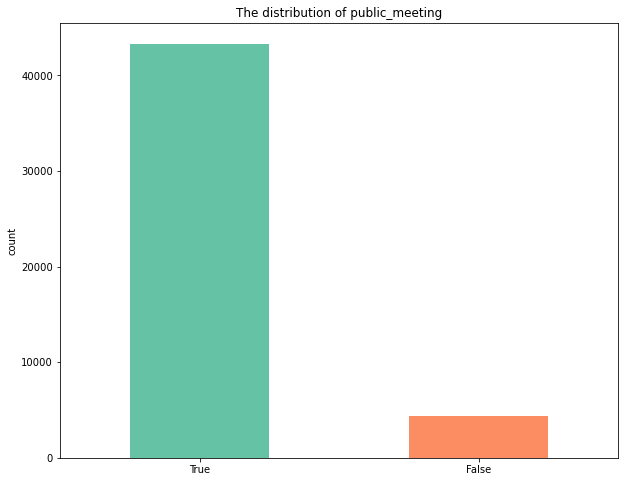

In [24]:
fig = plt.figure(figsize=(10,8))  
train_data.public_meeting.value_counts().plot(kind="bar", title="The distribution of public_meeting", ylabel="count", color=my_cmap.colors)
plt.xticks(rotation=0);
print(f"{len(train_data.num_private[train_data.num_private!=0])/len(train_data):.2%} of the pumps in the dataset are private");

>BEschreibung

In [38]:
# function for plotting pie charts for each given category
def plot_multiple_pie_by_category(df, category, n_max=None, n_cols=3):
    if n_max is None:
        categories = df[category].unique()
    else:
        categories = df[category].value_counts().index.tolist()[:n_max]
    
    n_rows = len(categories)
    fig = make_subplots(rows=len(categories)//n_cols, cols=n_cols, specs=[[{"type": "pie"}]*n_cols]*(len(categories)//n_cols))
    for i, label in enumerate(categories):
        df_label = df[df[category] == label]
        fig.add_trace(go.Pie(labels=df_label["status_group"].unique(),
        values=df_label["status_group"].value_counts(), 
        name=label, title=f"{label}: {len(df_label)} pumps"), row=i//n_cols+1, col=i%n_cols+1)
    fig.update_layout(height=max(900, n_rows*100), width=1800)
    fig.show()

Farbe anpassen

#### Abhängigkeit des Merkmals Funder zu Status_Group

In [39]:
plot_multiple_pie_by_category(train_data, "funder", n_max=21)

#### Verteilung des Merkmals status_group bei Größe der Bevölkerung

In [22]:
px.box(train_data, x="population", y="status_group")

>Bezug nehmen auf die 0 Werte + Begründung

#### Region

>Analysierte Spalten: gps_height, longitude, latitude, subvillage, region, region_code, district_code

In [46]:
fig = px.scatter_geo(train_data.sample(1_000), lat="latitude", lon="longitude", color="status_group",  scope="africa", opacity=0.7)
fig.show()

> Aus der Karte lässt sich ablesen, dass es sich hauptsächlich um Brunnen in dem afrikanischen Land Tansania handelt. Bei genauerer Betrachtung des Ausreißers wird klar, dass es sich hier um einen "Ausreißer" handelt, da in seiner Lattitude ein Buchstabe befindet.

### Bewertung der Daten: 
An diesem Punkt wird die Qualität des Datenbestandes bewertet. Es soll festgestellt werden, ob die Datenmenge für die Analyse ausreichend und verwendbar ist, wobei besonders auf fehlende Attributwerte zu achten ist.
> Aus der vorangegangenen Analyse des Datensatzes im Rahmen des Data Understandings kann festgestellt werden, dass die Daten vor der weiteren Verarbeitung/ Verwendung im nächsten Schritt durch die Data Preparation bereinigt und aufbereitet werden müssen.

## Data Preperation

### Auswahl der Daten:
Die Auswahl der Daten für das Data Mining hängt stark von den Zielen ab, die man für das Data Mining-Projekt definiert. Hier spielen die Datenqualität und die technischen Gegebenheiten eine große Rolle. Es wird eine Selektion der Daten vorgenommen. Am Ende dieses Prozesses sollte sich deutlich zeigen, welche Datenmengen(-Sets) in die Analyse aufgenommen werden oder ausgeschlossen werden.
>Auswahl der Daten

>BEgründung warum die Daten rausgehen

In [51]:
df = train_data
numerical_cols = [col for col in df.columns if type(df.loc[0, col]) in [np.int64, np.float64]]
for col in ["id", "region_code", "district_code", "gps_height", "num_private"]:
    numerical_cols.remove(col)

numerical_cols

['amount_tsh', 'longitude', 'latitude', 'population', 'construction_year']

In [52]:
cat_cols = [col for col in df.columns if type(df.loc[0, col]) not in [np.int64, np.float64]]
for col in ["date_recorded", "funder", "installer", "wpt_name", "subvillage", "ward", "scheme_name", "status_group", "basin", "region", "lga", "recorded_by"]:
    cat_cols.remove(col)

cat_cols

['public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

### Bereinigung der Daten: 
Ohne eine Bereinigung der Daten ist ein erfolgreiches Data Mining-Projekt fraglich. Es gilt, eine saubere Datenmenge auszuwählen oder die Datenmenge muss bereinigt sein, um das gewünschte Ergebnis in der Modellierung zu erreichen.
Um die Daten in eine brauchbare Darstellungsform zu bringen, transformiert man die Daten. Die Transformation kodiert Daten und verändert deren Granularität durch Aggregation oder Disaggregation.
>Bei der folgenden Bereinigung werden die Nullwerte durch den Median bzw. dem Modus der jeweiligen Spalte ersetzt.

>Die Dataframes werden in Numpy Arrays konvertiert für die folgende Übergabe an die Modelle.


#### Bereinigung des Trainingsdatensatzes:

In [70]:
ds = Dataset(encoder="onehot", normalizer="standard")
# continous variables
for var in numerical_cols:
    df[var] = df[var].fillna(df[var].mean())
    vals = ds.normalize(df, var, mode="train")
    ds.add_feature(vals, var)

In [71]:
# encodings
top_n = 30
for var in cat_cols:
    df[var] = df[var].fillna(df[var].mode())
    vals = ds.encode(df, var, mode="train", top_n=top_n)
    ds.add_feature(vals, var)

In [72]:
label_arr = LabelEncoder().fit_transform(df["status_group"]).reshape(-1, 1)

ds.add_label(label_arr)

In [73]:
X, y, names = ds.get_X(), ds.get_y(), ds.get_feature_names()

#### Bereinigung des Testdatensatzes:

In [74]:
ds.reset_for_test()

In [75]:
# continous variables
for var in numerical_cols:
    test_data[var] = test_data[var].fillna(df[var].mean())
    vals = ds.normalize(test_data, var, mode="test")
    ds.add_feature(vals, var)

In [76]:
# encodings
top_n = 30
for var in cat_cols:
    test_data[var] = test_data[var].fillna(df[var].mode())
    vals = ds.encode(test_data, var, mode="test", top_n=top_n)
    ds.add_feature(vals, var)

In [77]:
label_arr = LabelEncoder().fit_transform(test_data["status_group"]).reshape(-1, 1)

ds.add_label(label_arr)

In [78]:
X_test, y_test, names_test = ds.get_X(), ds.get_y(), ds.get_feature_names()

## Modeling

### Auswahl der Modellierungstechnik: 
Hier gilt es eine Modellierungstechnik auswählen, mit der man das Modell erstellt
>Für die Modellauswahl werden 12 unterschiedliche Modelle betrachtet. Dabei werden drei Dummy Modelle erstellt (AllOnes, AllZeros, Random).

In [79]:
class RandomPredictor:
    def __init__(self):
        self.__class__.__name__ = "----RANDOM----"
    def fit(self, X, y):
        return self
    def predict(self, X):
        return np.random.randint(0, 2, len(X))

    def predict_proba(self, X):
        return np.array([1/3, 1/3, 1/3]*len(X)).reshape(-1, 3)

class AllZeros:
    def __init__(self):
        self.__class__.__name__ = "----ALL 0's----"
    def fit(self, X, y):
        return self
    def predict(self, X):
        return np.zeros(X.shape[0])

    def predict_proba(self, X):
        return np.array([1, 0, 0]*len(X)).reshape(-1, 3)

class AllOnes:
    def __init__(self):
        self.__class__.__name__ = "----ALL 1's----"
    def fit(self, X, y):
        return self
    def predict(self, X):
        return np.ones(X.shape[0])
    def predict_proba(self, X):
        return np.array([0, 1, 0]*len(X)).reshape(-1, 3)

In [81]:
models = [
    RandomPredictor(),
    AllZeros(),
    AllOnes(),
    DecisionTreeClassifier(), 
    GaussianNB(), 
    LogisticRegression(max_iter=300), 
    # Perceptron(max_iter=100), 
    SVC(max_iter=300, probability=True), 
    RandomForestClassifier(), 
    KNeighborsClassifier(), 
    SGDClassifier(loss="modified_huber"), 
    # XGBClassifier()
]

In [82]:
scores_multi_class = {
    "model_name": [],
    "f1_score": [],
    "precision": [],
    "recall": [],
    "accuracy": [],
    "roc_auc": []
}

scores_not_functional = {
    "model_name": [],
    "f1_score": [],
    "precision": [],
    "recall": [],
    "accuracy": [],
    "roc_auc": []
}

scores_needs_repair = {
    "model_name": [],
    "f1_score": [],
    "precision": [],
    "recall": [],
    "accuracy": [],
    "roc_auc": []
}

mask_train_not_functional = y!=1
mask_test_not_functional = y_test!=1

mask_train_needs_repair = y!=2
mask_test_needs_repair = y_test!=2

l = [
    (..., ..., scores_multi_class),
    (mask_train_not_functional, mask_test_not_functional, scores_not_functional),
    (mask_train_needs_repair, mask_test_needs_repair, scores_needs_repair)
]

In [83]:
metrics = [
    ("f1_score", lambda y_true, y_pred, y_prob: f1_score(one_vs_all(y_true), one_vs_all(y_pred))),
    ("precision", lambda y_true, y_pred, y_prob: precision_score(one_vs_all(y_true), one_vs_all(y_pred), zero_division=0)),
    ("recall", lambda y_true, y_pred, y_prob: recall_score(one_vs_all(y_true), one_vs_all(y_pred), zero_division=0)),
    ("accuracy", lambda y_true, y_pred, y_prob: accuracy_score(one_vs_all(y_true), one_vs_all(y_pred))),
    ("roc_auc", lambda y_true, y_pred, y_prob: roc_auc_score(one_vs_all(y_true), y_prob))
]

In [84]:
for model, (train_mask, test_mask, scores) in tqdm(product(models, l), total=len(models)*len(l)):
    model = model.fit(X[train_mask], y[train_mask])
    y_prob, y_pred = get_prob_and_pred(model, X_test[test_mask])
    scores["model_name"] += [model.__class__.__name__]
    for name, function in metrics:
        scores[name] += [function(y_test[test_mask], y_pred, y_prob)]

 50%|█████     | 15/30 [00:16<00:18,  1.23s/it]c:\Users\Isabel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

 57%|█████▋    | 17/30 [00:51<01:50,  8.46s/it]c:\Users\Isabel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [85]:
df = pd.DataFrame(data=scores_not_functional).sort_values("roc_auc", ascending=False)
df

,model_name,f1_score,precision,recall,accuracy,roc_auc
7,RandomForestClassifier,0.813035,0.842777,0.785321,0.849456,0.918805
8,KNeighborsClassifier,0.786213,0.824785,0.751088,0.829746,0.886998
5,LogisticRegression,0.695361,0.822504,0.602263,0.780048,0.835459
9,SGDClassifier,0.687819,0.793627,0.606905,0.770375,0.823726
3,DecisionTreeClassifier,0.793831,0.796264,0.791413,0.828658,0.823192
4,GaussianNB,0.666996,0.770928,0.587757,0.755381,0.798572
6,SVC,0.175059,0.463263,0.107920,0.576058,0.550748
0,----RANDOM----,0.588376,0.416808,1.000000,0.416808,0.500000
1,----ALL 0's----,0.000000,0.000000,0.000000,0.583192,0.500000
2,----ALL 1's----,0.588376,0.416808,1.000000,0.416808,0.500000


>Interpretation von f1, precision....
>Auswahl des besten Modells + Begründung

In [86]:
df = pd.DataFrame(data=scores_needs_repair).sort_values("roc_auc", ascending=False)
df

,model_name,f1_score,precision,recall,accuracy,roc_auc
7,RandomForestClassifier,0.499069,0.617512,0.418750,0.901519,0.859460
8,KNeighborsClassifier,0.471910,0.588785,0.393750,0.896760,0.806832
5,LogisticRegression,0.093159,0.680851,0.050000,0.885960,0.749046
3,DecisionTreeClassifier,0.437742,0.433384,0.442188,0.866923,0.696367
9,SGDClassifier,0.003101,0.200000,0.001563,0.882299,0.684454
4,GaussianNB,0.228822,0.130284,0.939063,0.258466,0.569888
6,SVC,0.000000,0.000000,0.000000,0.882848,0.565648
0,----RANDOM----,0.209733,0.117152,1.000000,0.117152,0.500000
1,----ALL 0's----,0.000000,0.000000,0.000000,0.882848,0.500000
2,----ALL 1's----,0.209733,0.117152,1.000000,0.117152,0.500000


>Interpretation von f1, precision....
>Auswahl des besten Modells + Begründung

In [87]:
df = pd.DataFrame(data=scores_multi_class).sort_values("roc_auc", ascending=False)
df

,model_name,f1_score,precision,recall,accuracy,roc_auc
7,RandomForestClassifier,0.795597,0.813924,0.778077,0.816611,0.892411
8,KNeighborsClassifier,0.774308,0.804537,0.746269,0.800449,0.863806
5,LogisticRegression,0.679617,0.800133,0.590653,0.744557,0.807578
9,SGDClassifier,0.674745,0.771654,0.599462,0.734905,0.793294
3,DecisionTreeClassifier,0.765786,0.765973,0.765598,0.785185,0.785336
4,GaussianNB,0.631984,0.475059,0.943724,0.495847,0.558718
6,SVC,0.241872,0.448048,0.165647,0.523681,0.540124
0,----RANDOM----,0.628914,0.458698,1.000000,0.458698,0.500000
1,----ALL 0's----,0.000000,0.000000,0.000000,0.541302,0.500000
2,----ALL 1's----,0.628914,0.458698,1.000000,0.458698,0.500000


>Interpretation von f1, precision....
>Auswahl des besten Modells + Begründung

### Testmodell erstellen: 
Nach Auswahl des Modells wird ein Testmodell erstellt, um Qualität und Genauigkeit des Modells zu überprüfen. In überwachten Verfahren, wie der Klassifikation, ist es üblich, die Fehlerraten als Qualitätsmaß zu nutzen.
>Aus den vorangegangenen Analysen geht hervor, dass der RandomForestClassifier bei allen drei Modellen, die beste Performance aufzeigt. Daher wird dieses Modell im folgenden weiter optimiert um die bestmöglichen Resultate zu erzielen.

In [89]:
param_grid = {
    'n_estimators': [40, 100, 200, 500],
    # 'max_depth': [50, 100, None],
    # 'max_features': [None, 'sqrt'],
    'max_samples': [0.8, 1.0]
}
gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, verbose=1)

In [90]:
gs.fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Isabel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Isabel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Isabel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "c:\Users\Isabel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 110, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0


c:\Users\Isabel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_samples': [0.8, 1.0],
                         'n_estimators': [40, 100, 200, 500]},
             verbose=1)

In [91]:
df = pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

In [92]:
df[["param_max_samples", "param_n_estimators", "mean_test_score", "mean_fit_time"]]

,param_max_samples,param_n_estimators,mean_test_score,mean_fit_time
3,0.8,500,0.794435,90.382313
1,0.8,100,0.792692,19.189634
2,0.8,200,0.792672,35.932351
0,0.8,40,0.790869,7.362815
4,1.0,40,NaN,0.112950
5,1.0,100,NaN,0.161121
6,1.0,200,NaN,0.153843
7,1.0,500,NaN,0.109753


In [93]:
model = gs.best_estimator_.fit(X, y)

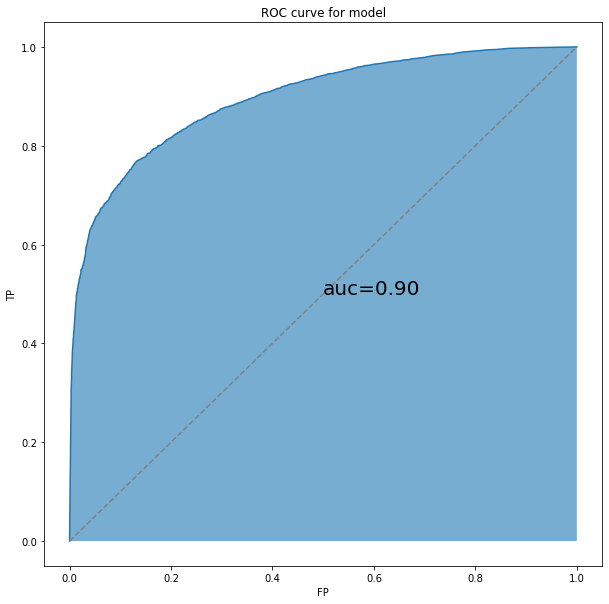

In [94]:
plot_roc(model, X_test, y_test, model_name="model")

## Evaluation

### Bewertung des Modells: 
Hier ist das Modell nach der im Vorfeld definierten Data Mining-Zielsetzung zu bewerten. Des Weiteren gilt es die Data Mining-Ergebnisse in Bezug auf die Fragestellung zu bewerten.
>AUC Modell 1

>AUC Modell 2

>AUC Modell 3

### Bewerten der Resultate: 
In diesem Schritt bewertet man, inwieweit das Modell die Projektziele erreicht. Wenn die Ziele nicht erreicht sind, ist aufzuführen, aus welchen Gründen.
>Begründung warum das Modell eingesetzt werden sollte, positiver Effekt....

### Bewertung des Prozesses: 
Das Data Mining-Projekt wird rückblickend bewertet. Es wird festgestellt, ob alle wichtigen Faktoren betrachtet wurden und inwieweit die Attribute für zukünftige Data Mining-Projekte zu nutzen sind.
>Auffälligkeiten bei den Daten, Modellen, Ergebnissen

>Zusammenarbeit

## Deployment

Die Deployment-Phase bildet in der Regel die Endphase eines Data Mining-Projektes. Hier werden die gewonnenen Erkenntnisse so geordnet und präsentiert, sodass für den Auftraggeber die Möglichkeit besteht dieses Wissen zu nutzen. Dazu gehört eine eventuelle Implementierungsstrategie, die Überwachung der Gültigkeit der Modelle, ein zusammenfassender Bericht und eine Präsentation.
>Fazit

>Entfällt?

Quellen:
<ul>
    <li>Quelle: https://datasolut.com/crisp-dm-standard/amp/</li>
</ul>